<a href="https://colab.research.google.com/github/Amitgm/Employee_attrition/blob/main/M2_MP4_NB_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1c7PrbKrURFcnEB61dSoS9cBnUUVhhj-l/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [2]:
!pip -qq install catboost

### Import Required Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [4]:
# read the dataset
dataset = pd.read_csv("hr_employee_attrition_train.csv")
# YOUR CODE HERE
dataset.head(10)

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8,No
1,34,Travel_Rarely,970,Research & Development,8,2,Medical,1,757,2,Female,96,3,2,Healthcare Representative,3,Single,6142,7360,3,Y,No,11,3,4,80,0,10,2,3,5,1,4,3,No
2,39,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3,Yes
3,26,Travel_Rarely,933,Sales,1,3,Life Sciences,1,476,3,Male,57,3,2,Sales Executive,3,Married,5296,20156,1,Y,No,17,3,2,80,1,8,3,3,8,7,7,7,No
4,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,Married,2387,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No
5,29,Travel_Rarely,408,Research & Development,25,5,Technical Degree,1,565,3,Female,71,2,1,Research Scientist,2,Married,2546,18300,5,Y,No,16,3,2,80,0,6,2,4,2,2,1,1,Yes
6,57,Travel_Rarely,593,Research & Development,1,4,Medical,1,482,4,Male,88,3,2,Healthcare Representative,3,Married,6755,2967,2,Y,No,11,3,3,80,0,15,2,3,3,2,1,2,No
7,28,Travel_Rarely,1423,Research & Development,1,3,Life Sciences,1,1506,1,Male,72,2,1,Research Scientist,3,Divorced,1563,12530,1,Y,No,14,3,4,80,1,1,2,1,1,0,0,0,No
8,33,Travel_Rarely,134,Research & Development,2,3,Life Sciences,1,242,3,Male,90,3,1,Research Scientist,4,Single,2500,10515,0,Y,No,14,3,1,80,0,4,2,4,3,1,0,2,No
9,31,Travel_Frequently,667,Sales,1,4,Life Sciences,1,1427,2,Female,50,1,1,Sales Representative,3,Single,1359,16154,1,Y,No,12,3,2,80,0,1,3,3,1,0,0,0,Yes


In [5]:
# Check the shape of dataframe.
# YOUR CODE HERE
dataset.shape

(1170, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

#### Checking the description of the dataset

In [6]:
dataset.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.00000,1170.000000,1170.000000
mean,36.858120,797.822222,9.262393,2.917949,1.0,1021.113675,2.723932,65.501709,2.747009,2.049573,2.723077,6456.937607,14411.584615,2.750427,15.204274,3.153846,2.739316,80.0,0.785470,11.315385,2.842735,2.745299,6.925641,4.17094,2.138462,4.061538
std,9.183448,403.592661,8.150868,1.011534,0.0,600.548289,1.095847,20.310054,0.702625,1.096352,1.103799,4660.476506,7078.167743,2.521952,3.688952,0.360955,1.075225,0.0,0.847253,7.879363,1.306385,0.718864,6.232076,3.62788,3.201738,3.586350
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,461.000000,2.000000,2.000000,1.0,496.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2914.750000,8387.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,35.000000,798.000000,7.000000,3.000000,1.0,1008.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4903.500000,14536.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,1146.750000,14.000000,4.000000,1.0,1548.500000,4.000000,83.000000,3.000000,3.000000,4.000000,8215.250000,20456.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.750000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


#### Checking the dtype

In [7]:
# YOUR CODE HERE
dataset.dtypes

,0
age,int64
businesstravel,object
dailyrate,int64
department,object
distancefromhome,int64
education,int64
educationfield,object
employeecount,int64
employeenumber,int64
environmentsatisfaction,int64


In [8]:
dataset.nunique()

,0
age,43
businesstravel,3
dailyrate,778
department,3
distancefromhome,29
education,5
educationfield,6
employeecount,1
employeenumber,1170
environmentsatisfaction,4


#### The dataset has no missing values

In [9]:
dataset.isna().sum()

,0
age,0
businesstravel,0
dailyrate,0
department,0
distancefromhome,0
education,0
educationfield,0
employeecount,0
employeenumber,0
environmentsatisfaction,0


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

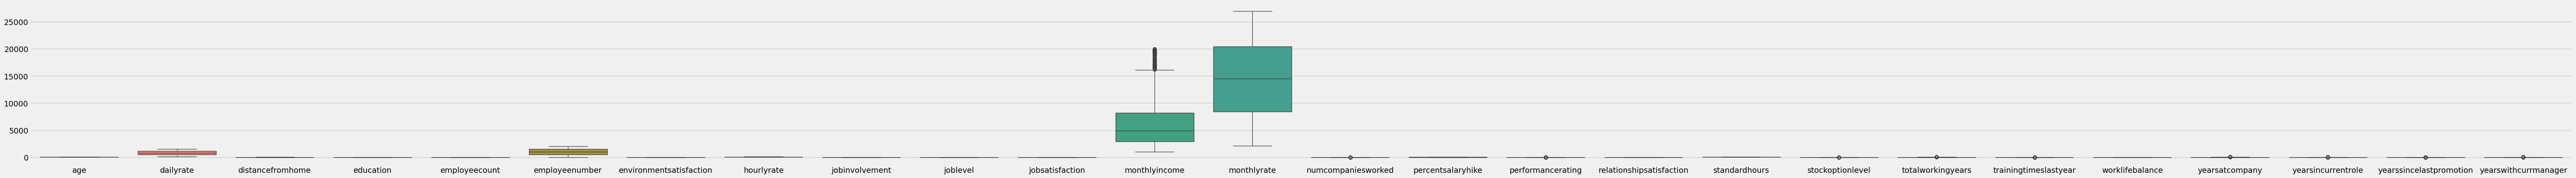

In [10]:
# Check for outliers
# YOUR CODE HERE
plt.figure(figsize=(80,5))
sns.boxplot(dataset)
plt.subplots_adjust(left=0.1, right=0.9)  # Adjust these values as needed

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [11]:
numerical_cols = [cols for cols in dataset.columns if dataset[cols].dtype != 'object']

In [12]:
categorical_cols =  [cols for cols in dataset.columns if dataset[cols].dtype == 'object']

In [13]:
numerical_cols

['age',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'standardhours',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

In [14]:
# YOUR CODE HERE
def handle_outliers(df, numerical_cols):
    '''Change the values of outlier to upper and lower whisker values '''
    for colm in numerical_cols:

      q1 = df.describe()[colm].loc["25%"]
      q3 = df.describe()[colm].loc["75%"]
      iqr = q3 - q1
      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)

      df[colm] = np.clip(df[colm],lower_bound,upper_bound)

    return df



dataset = handle_outliers(dataset, numerical_cols)

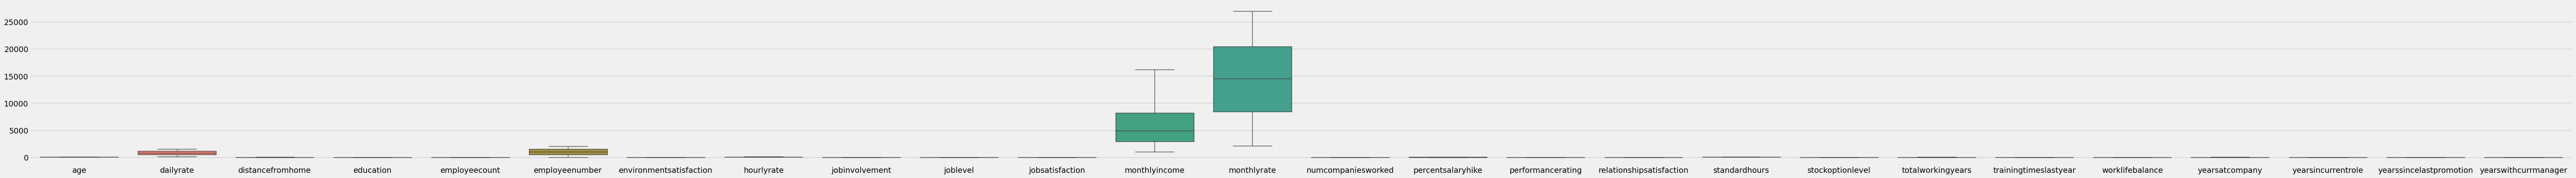

In [15]:
# Recheck for outliers
# YOUR CODE HERE
plt.figure(figsize=(80,5))
sns.boxplot(dataset)
plt.subplots_adjust(left=0.1, right=0.9)  # Adjust these values as needed

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [16]:
dataset["attrition"].value_counts()

,attrition
No,981
Yes,189


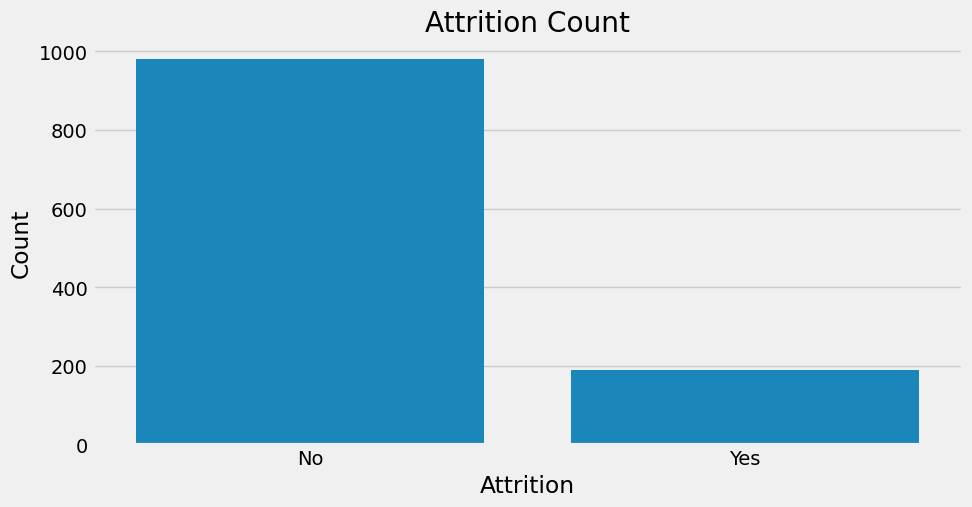

In [17]:
# Count of unique values in Attrition column
# YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.barplot(dataset["attrition"].value_counts())
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Attrition Count")
plt.show()

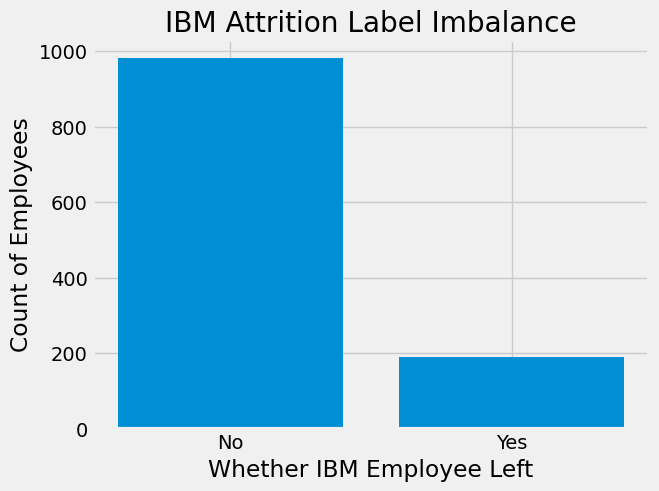

In [18]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
plt.bar(dataset["attrition"].value_counts().index, dataset["attrition"].value_counts().values)
plt.title('IBM Attrition Label Imbalance')
plt.xlabel('Whether IBM Employee Left')
plt.ylabel('Count of Employees')
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

In [19]:
dataset.head(1)

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0.0,Y,No,13,3,4,80,2.0,10.0,2.0,2,9,8.0,3.0,8.0,No


In [20]:
y = dataset["attrition"]

In [21]:
x = dataset.drop(["attrition"],axis=1)

In [22]:
numerical_cols

['age',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'standardhours',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [23]:
dataset.drop(["over18"],axis=1,inplace=True)

In [24]:
categorical_cols = [cols for cols in dataset.columns if dataset[cols].dtype == 'object']

<Figure size 5000x4000 with 0 Axes>

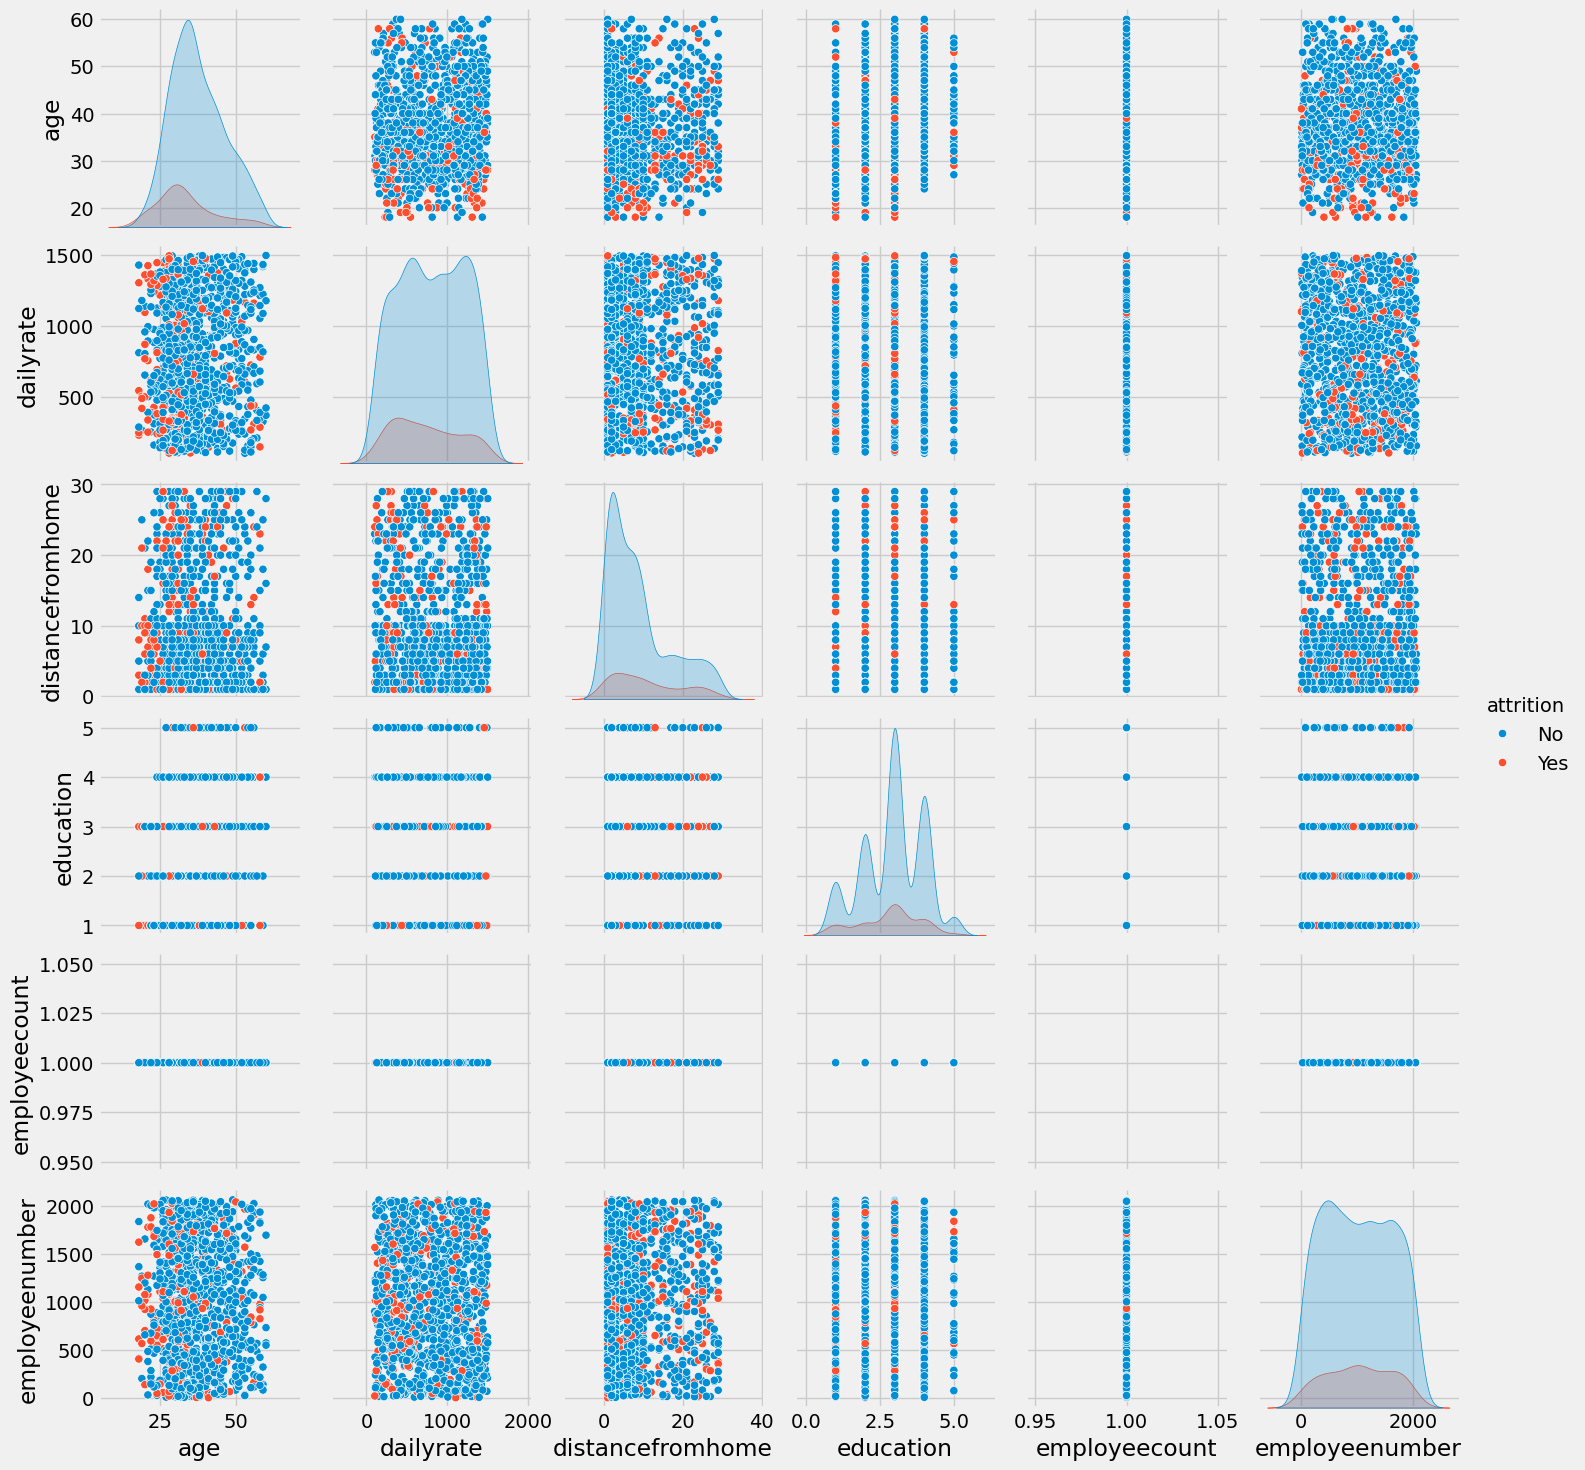

In [25]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
plt.figure(figsize=(50,40))
features = ['monthlyincome', 'attrition', 'yearsatcompany', 'yearswithcurrmanager', 'joblevel', 'totalworkingyears']
pairplot = sns.pairplot(dataset, diag_kind='kde', hue='attrition',x_vars=numerical_cols[0:6],y_vars =numerical_cols[0:6] )
#
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

In [26]:
numerical_f = dataset.select_dtypes(include=['number'])

In [27]:
unique_counts = dataset[numerical_cols].nunique()

indices = np.where(unique_counts > 1)[0]
selected_columns = unique_counts.index[indices]
filtered_dataset = dataset[selected_columns]
filtered_dataset

,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,45,556,25,2,1888,2,93,2,2,4,5906,23888,0.0,13,4,2.0,10.0,2.0,2,9,8.0,3.000,8.0
1,34,970,8,2,757,2,96,3,2,3,6142,7360,3.0,11,4,0.0,10.0,2.0,3,5,1.0,4.000,3.0
2,39,360,23,3,1310,3,93,3,1,1,3904,22154,0.0,13,1,0.0,6.0,2.0,3,5,2.0,0.000,3.0
3,26,933,1,3,476,3,57,3,2,3,5296,20156,1.0,17,2,1.0,8.0,3.0,3,8,7.0,6.875,7.0
4,40,329,1,4,1361,2,88,3,1,2,2387,6762,3.0,22,3,1.0,7.0,3.0,3,4,2.0,0.000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,47,1169,14,4,1934,3,64,3,2,2,5467,2125,8.0,18,3,1.0,16.0,4.0,4,8,7.0,1.000,7.0
1166,48,530,29,1,473,1,91,3,3,3,12504,23978,3.0,21,2,1.0,15.0,3.0,1,0,0.0,0.000,0.0
1167,36,469,3,3,1257,3,46,3,1,2,3692,9256,1.0,12,3,0.0,12.0,2.0,2,11,10.0,0.000,7.0
1168,46,849,26,2,1801,2,98,2,2,2,7991,25166,8.0,15,3,0.0,6.0,3.0,3,2,2.0,2.000,2.0


In [28]:
filtered_dataset.dtypes

,0
age,int64
dailyrate,int64
distancefromhome,int64
education,int64
employeenumber,int64
environmentsatisfaction,int64
hourlyrate,int64
jobinvolvement,int64
joblevel,int64
jobsatisfaction,int64


In [29]:
np.where(dataset[numerical_cols].nunique().values > 1)
#  np.where(arr > 20)

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
        20, 21, 22, 23, 24, 25]),)

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [30]:
# YOUR CODE HERE
sns.heatmap?

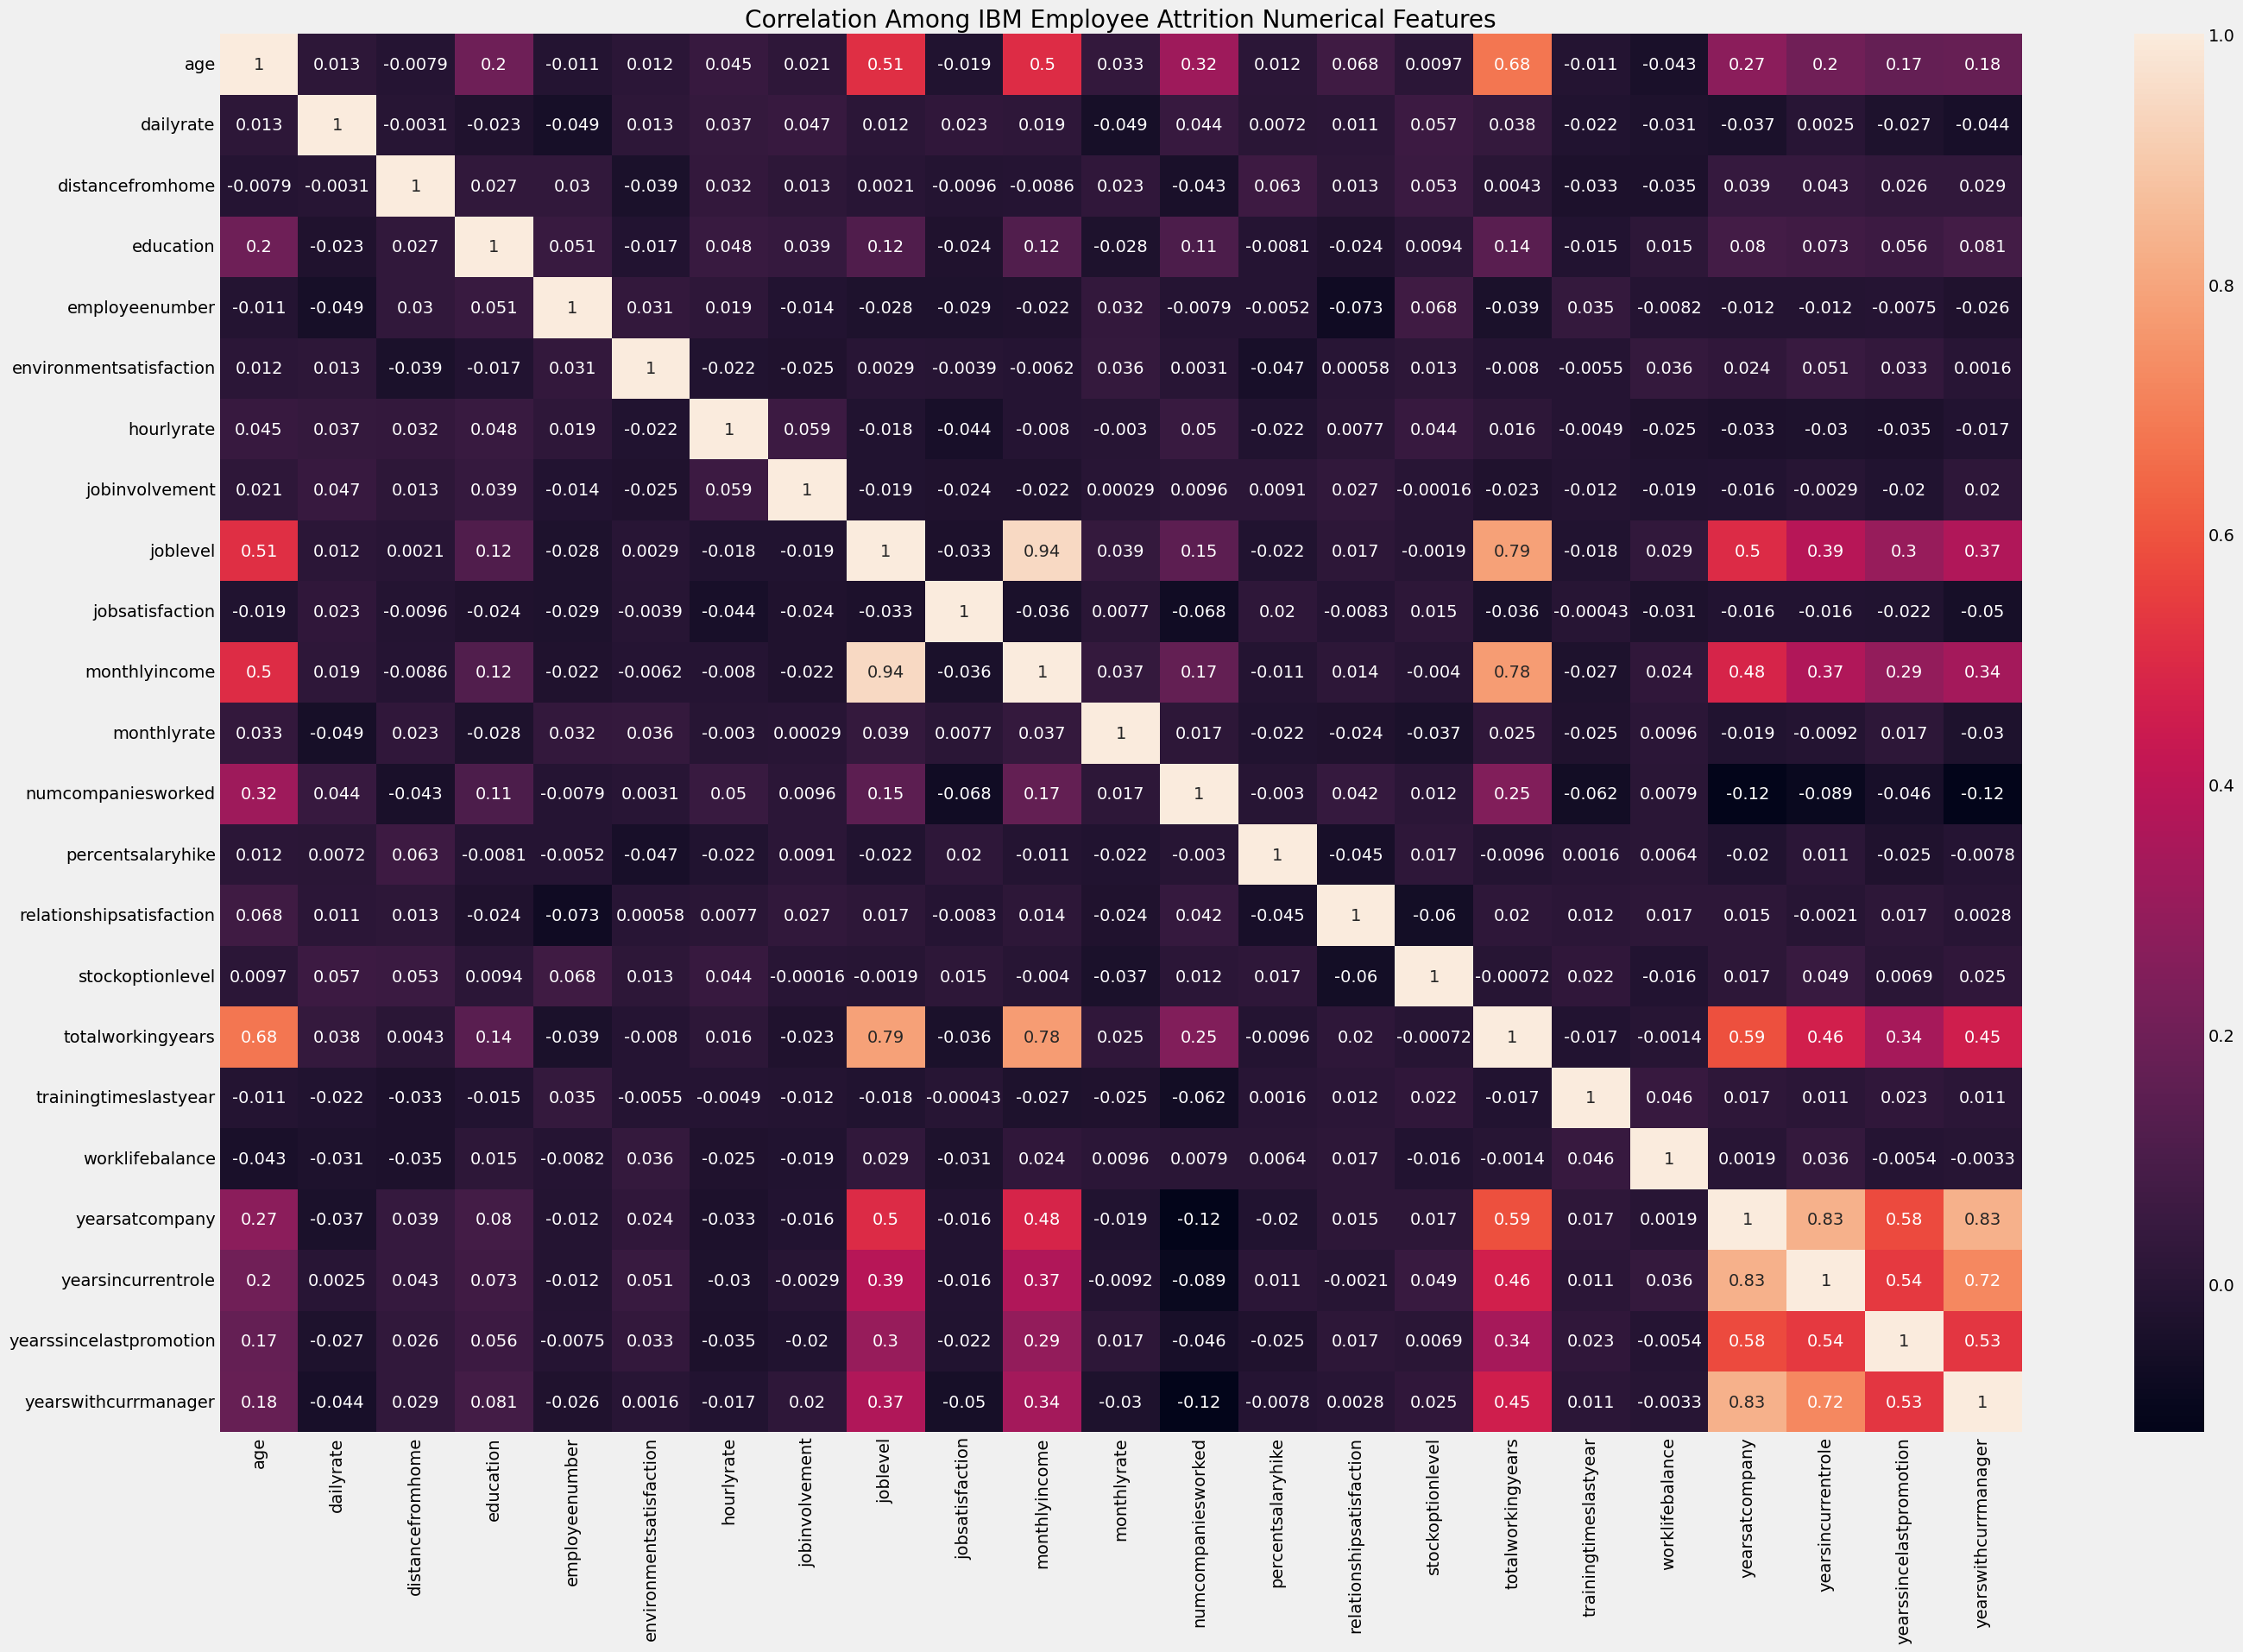

In [31]:
# Visualize heatmap
# YOUR CODE HERE
plt.figure(figsize=(30,20))
sns.heatmap(filtered_dataset.corr(),annot=True,)
plt.title('Correlation Among IBM Employee Attrition Numerical Features')
plt.show()

In [32]:
filtered_dataset[categorical_cols] = dataset[categorical_cols]

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [34]:
dataset[numerical_cols].values

array([[4.500e+01, 5.560e+02, 2.500e+01, ..., 8.000e+00, 3.000e+00,
        8.000e+00],
       [3.400e+01, 9.700e+02, 8.000e+00, ..., 1.000e+00, 4.000e+00,
        3.000e+00],
       [3.900e+01, 3.600e+02, 2.300e+01, ..., 2.000e+00, 0.000e+00,
        3.000e+00],
       ...,
       [3.600e+01, 4.690e+02, 3.000e+00, ..., 1.000e+01, 0.000e+00,
        7.000e+00],
       [4.600e+01, 8.490e+02, 2.600e+01, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       [5.800e+01, 1.145e+03, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

#### Using one hot encoding and creating an appended DataFrame

In [35]:
encoder = OneHotEncoder(sparse_output=False,drop="first")  # drop="first" avoids multicollinearity

# label_encoder = LabelEncoder()

encoded_data = encoder.fit_transform(filtered_dataset[categorical_cols])

encoded_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [36]:
cat_features = encoder.get_feature_names_out().tolist()

In [37]:
feature_dataframe = np.concatenate((dataset[numerical_cols].values,encoded_data),axis=1)

In [38]:
feature_names = list(dataset[numerical_cols].columns) + cat_features

In [39]:
feature_dataframe = pd.DataFrame(feature_dataframe,columns=feature_names)

In [40]:
feature_dataframe.drop(["joblevel"],axis=1,inplace=True)

In [41]:
feature_dataframe.rename(columns={"attrition_Yes":"attrition"},inplace=True)

In [42]:
feature_dataframe.head(1)

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition
0,45.0,556.0,25.0,2.0,1.0,1888.0,2.0,93.0,2.0,4.0,5906.0,23888.0,0.0,13.0,3.0,4.0,80.0,2.0,10.0,2.0,2.0,9.0,8.0,3.0,8.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Preparing the Validation data

In [43]:
train_ibm_df, test_ibm_df = train_test_split(feature_dataframe, test_size = 0.2, stratify = feature_dataframe['attrition'], random_state = 123)
train_ibm_df.shape, test_ibm_df.shape

((936, 47), (234, 47))

In [44]:
feature_dataframe.shape

(1170, 47)

In [45]:
print("Attrition train")
print(train_ibm_df['attrition'].value_counts()/len(train_ibm_df))
print("Attrition test")
print(test_ibm_df['attrition'].value_counts()/len(test_ibm_df))

Attrition train
0.0    0.838675
1.0    0.161325
Name: attrition, dtype: float64
Attrition test
0.0    0.837607
1.0    0.162393
Name: attrition, dtype: float64


In [46]:
x_train, y_train = train_ibm_df.drop(["attrition"],axis=1),train_ibm_df["attrition"]
x_test, y_test = test_ibm_df.drop(["attrition"],axis=1),test_ibm_df["attrition"]

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning [CDS-B9 GDrive -> Module 2 -> Assignments -> January 11, 2025 -> Additional Notebook (ungraded) -> Addl_NB_Tuning_hyerparameters_using_Hyperopt]

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

#### Copy the data for cat boost algorithm

In [47]:
cbo_data = train_ibm_df.copy()

In [48]:
x_cat_train, y_cat_train = cbo_data.drop(["attrition"],axis=1),cbo_data["attrition"]

#### Smote for imbalanced data

In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_df1, y_df1 = smote.fit_resample(x_cat_train, y_cat_train)

In [50]:
y_df1.value_counts()

,attrition
0.0,785
1.0,785


### Model Definition for Catboost Algorithm

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [51]:
help(CatBoostClassifier)

Help on class CatBoostClassifier in module catboost.core:

class CatBoostClassifier(CatBoost)
 |  CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, classes_count=None, class_weights=None, auto_class_weights=None, class_names=None, one_hot_max_size=None, random_strength=None, random_score_type=None, name=None, ignored_feature

In [52]:
model = CatBoostClassifier(
    iterations=200,  # Number of boosting iterations
    learning_rate=0.01,  # Learning rate
    depth=10,  # Depth of the trees
    loss_function="Logloss",  # Loss function for binary classification
    verbose=10,  # Print training progress every 10 iterations
    l2_leaf_reg = 0.2
)

# Train the model
model.fit(x_df1, y_df1)

# Make predictions
y_pred = model.predict(x_test)  # Use x_test instead of test_pool unless defined

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

0:	learn: 0.6788750	total: 159ms	remaining: 31.5s
10:	learn: 0.5519264	total: 1.09s	remaining: 18.8s
20:	learn: 0.4532511	total: 2.01s	remaining: 17.1s
30:	learn: 0.3796398	total: 2.93s	remaining: 16s
40:	learn: 0.3193683	total: 3.89s	remaining: 15.1s
50:	learn: 0.2734373	total: 4.83s	remaining: 14.1s
60:	learn: 0.2373194	total: 5.76s	remaining: 13.1s
70:	learn: 0.2032523	total: 7.43s	remaining: 13.5s
80:	learn: 0.1796771	total: 9.15s	remaining: 13.4s
90:	learn: 0.1591674	total: 10.3s	remaining: 12.3s
100:	learn: 0.1413316	total: 11.2s	remaining: 11s
110:	learn: 0.1260153	total: 12.1s	remaining: 9.71s
120:	learn: 0.1128875	total: 13s	remaining: 8.51s
130:	learn: 0.1013455	total: 14s	remaining: 7.35s
140:	learn: 0.0922859	total: 14.9s	remaining: 6.23s
150:	learn: 0.0837052	total: 15.8s	remaining: 5.13s
160:	learn: 0.0769284	total: 16.7s	remaining: 4.05s
170:	learn: 0.0709005	total: 17.6s	remaining: 2.99s
180:	learn: 0.0646049	total: 18.6s	remaining: 1.95s
190:	learn: 0.0598273	total: 19

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       196
         1.0       0.76      0.42      0.54        38

    accuracy                           0.88       234
   macro avg       0.83      0.70      0.74       234
weighted avg       0.87      0.88      0.87       234



#### Using Hyperopt parameter

In [55]:
from hyperopt import fmin, tpe, hp, Trials,STATUS_OK

def cat_objective(space):

    cboost = CatBoostClassifier(
    eval_metric  = 'AUC',
    learning_rate = space['learning_rate'],
    iterations = space['iterations'],
    depth = space['depth'],
    l2_leaf_reg = space['l2_leaf_reg'],
    border_count = space['border_count'],
    )

    cboost.fit(x_df1, y_df1,
            cat_features=None)

    predictions = cboost.predict(x_test)
    test_preds = cboost.predict_proba(x_test)[:,1]
    train_preds = cboost.predict_proba(x_df1)[:,1]

    train_auc = roc_auc_score(y_df1, train_preds)
    test_auc = roc_auc_score(y_test, test_preds)
    accuracy = accuracy_score(y_test, predictions)
    F1 = f1_score(y_test, predictions)

    return {'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc, 'f1 score': F1,'status': STATUS_OK}

#### Defining the space for the hyperparameters

In [56]:
# Define the search space for hyperparameters (remove max_depth)
space = {
    'iterations': hp.randint('iterations',50,100),
    'depth': hp.randint('depth', 4, 12),  # Use depth only (no max_depth)
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'border_count': hp.randint('border_count', 32, 255)
}

# Set up Trials object to track the optimization process
trials = Trials()

# Run the optimization using the Tree-structured Parzen Estimator (TPE) algorithm
best_params = fmin(fn=cat_objective,  # Objective function to minimize
                   space=space,    # Search space
                   algo=tpe.suggest,  # Algorithm for hyperparameter tuning
                   max_evals=2,    # Number of evaluations
                   trials=trials)   # Trials object to track results

0:	total: 8.51ms	remaining: 655ms

1:	total: 18.6ms	remaining: 705ms

2:	total: 27.1ms	remaining: 678ms

3:	total: 37ms	remaining: 684ms

4:	total: 47ms	remaining: 687ms

5:	total: 58.7ms	remaining: 704ms

6:	total: 71.5ms	remaining: 726ms

7:	total: 83.8ms	remaining: 734ms

8:	total: 91ms	remaining: 697ms

9:	total: 100ms	remaining: 682ms

10:	total: 106ms	remaining: 646ms

11:	total: 114ms	remaining: 626ms

12:	total: 125ms	remaining: 627ms

13:	total: 140ms	remaining: 641ms

14:	total: 157ms	remaining: 661ms

15:	total: 167ms	remaining: 646ms

16:	total: 175ms	remaining: 629ms

17:	total: 188ms	remaining: 626ms

18:	total: 201ms	remaining: 623ms

19:	total: 211ms	remaining: 612ms

20:	total: 226ms	remaining: 614ms

21:	total: 240ms	remaining: 612ms

22:	total: 256ms	remaining: 613ms

23:	total: 272ms	remaining: 613ms

24:	total: 288ms	remaining: 611ms

25:	total: 305ms	remaining: 609ms

26:	total: 315ms	remaining: 596ms

27:	total: 325ms	remaining: 581ms

28:	total: 335ms	remaining:

In [57]:
best_params

{'border_count': 89,
 'depth': 6,
 'iterations': 78,
 'l2_leaf_reg': 5.4985817276410796,
 'learning_rate': 0.047973191449363954}

In [58]:
cboos_best = CatBoostClassifier(
    **best_params
    )

In [59]:
cboos_best.fit(x_df1, y_df1)

0:	learn: 0.6610863	total: 5.89ms	remaining: 454ms
1:	learn: 0.6281604	total: 15.6ms	remaining: 591ms
2:	learn: 0.6006975	total: 23.3ms	remaining: 582ms
3:	learn: 0.5769488	total: 29.8ms	remaining: 552ms
4:	learn: 0.5579352	total: 38ms	remaining: 555ms
5:	learn: 0.5382011	total: 44.4ms	remaining: 532ms
6:	learn: 0.5180898	total: 50.8ms	remaining: 515ms
7:	learn: 0.4971520	total: 58.1ms	remaining: 508ms
8:	learn: 0.4844068	total: 68.5ms	remaining: 526ms
9:	learn: 0.4684468	total: 77.8ms	remaining: 529ms
10:	learn: 0.4558477	total: 83.8ms	remaining: 511ms
11:	learn: 0.4412814	total: 89.4ms	remaining: 492ms
12:	learn: 0.4326919	total: 98.7ms	remaining: 493ms
13:	learn: 0.4218331	total: 106ms	remaining: 487ms
14:	learn: 0.4108499	total: 113ms	remaining: 475ms
15:	learn: 0.3971545	total: 120ms	remaining: 465ms
16:	learn: 0.3853787	total: 125ms	remaining: 450ms
17:	learn: 0.3753319	total: 133ms	remaining: 442ms
18:	learn: 0.3653193	total: 140ms	remaining: 435ms
19:	learn: 0.3574823	total: 14

In [60]:
y_pred = cboos_best.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9145299145299145

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       196
         1.0       0.91      0.53      0.67        38

    accuracy                           0.91       234
   macro avg       0.91      0.76      0.81       234
weighted avg       0.91      0.91      0.90       234



## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


In [63]:
!pip install scikit-learn==1.5.2
!pip install pandas==1.5.3
!pip install --upgrade xgboost

In [64]:
# Copy dataframe
# YOUR CODE HERE
xgb_data = train_ibm_df.copy()

In [65]:
x_gb_train, y_gb_train = xgb_data.drop(["attrition"],axis=1),xgb_data["attrition"]

In [66]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_df1, y_df1 = smote.fit_resample(x_gb_train, y_gb_train)

In [67]:
def xgb_objective(space):

    model = XGBClassifier(
        learning_rate = space['learning_rate'],
        n_estimators = int(space['n_estimators']),
        max_depth = int(space['max_depth']),
        min_child_weight = space['m_child_weight'],
        gamma = space['gamma'],
        subsample = space['subsample'],
        scale_pos_weight = 6,
        colsample_bytree = space['colsample_bytree'],
        # objective = 'binary:logistic'
    )

    model.fit(x_df1, y_df1)

    predictions = model.predict(x_test)
    test_preds = model.predict_proba(x_test)[:,1]
    train_preds = model.predict_proba(x_df1)[:,1]

    # xgb_booster = model.get_booster()

    train_auc = roc_auc_score(y_df1, train_preds)
    test_auc = roc_auc_score(y_test, test_preds)
    accuracy = accuracy_score(y_test, predictions)
    F1 = f1_score(y_test, predictions)

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc, 'f1 score': F1
           }

In [68]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 12, 1),
    'm_child_weight': hp.quniform('m_child_weight', 1, 6, 1),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'learning_rate': hp.loguniform('learning_rate', np.log(.001), np.log(.3)),
    'colsample_bytree': hp.quniform('colsample_bytree', .5, 1, .1)
}

In [69]:
trials = Trials()

# Run the optimization using the Tree-structured Parzen Estimator (TPE) algorithm
best_params = fmin(fn=xgb_objective,  # Objective function to minimize
                   space=space,    # Search space
                   algo=tpe.suggest,  # Algorithm for hyperparameter tuning
                   max_evals=10,    # Number of evaluations
                   trials=trials)   # Trials object to track results

100%|██████████| 10/10 [00:54<00:00,  5.43s/trial, best loss: 0.14164876476906552]


In [70]:
best_params

{'colsample_bytree': 0.9,
 'gamma': 0.75,
 'learning_rate': 0.19746206753979748,
 'm_child_weight': 3.0,
 'max_depth': 2.0,
 'n_estimators': 125.0,
 'subsample': 0.7000000000000001}

In [71]:
xgb_model = XGBClassifier(colsample_bytree = best_params["colsample_bytree"],
                          gamma = best_params["gamma"],
                          learning_rate = best_params["learning_rate"],
                          m_child_weight=best_params["m_child_weight"],
                          max_depth=int(best_params["max_depth"]),
                          n_estimators=int(best_params["n_estimators"]),
                          subsample=best_params["subsample"])

In [72]:
xgb_model.fit(x_df1, y_df1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.75, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19746206753979748,
              m_child_weight=3.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=None, num_parallel_tree=None, ...)

In [73]:
accuracy_score(y_test, xgb_model.predict(x_test))

0.8974358974358975

In [74]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       196
         1.0       0.77      0.53      0.62        38

    accuracy                           0.90       234
   macro avg       0.84      0.75      0.78       234
weighted avg       0.89      0.90      0.89       234



#### K-fold cross validation

In [75]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [76]:
for k, (train, test) in enumerate(kfold.split(x_df1, y_df1)):

  print(train)
  print(test)

[   0    1    2 ... 1567 1568 1569]
[  12   20   25   57   72   79   87   93   99  130  133  143  145  151
  154  162  171  175  223  228  230  234  247  254  260  267  274  279
  294  298  317  334  341  345  348  369  375  384  385  399  435  441
  445  449  465  496  508  515  524  528  537  545  546  556  565  589
  592  593  607  614  619  623  626  638  640  649  661  667  682  691
  694  699  739  755  756  761  785  792  805  811  818  825  830  832
  869  874  879  893  913  924  928  951  969  970  971  975  982  983
 1003 1006 1009 1014 1017 1020 1023 1027 1064 1067 1068 1075 1120 1124
 1125 1132 1140 1155 1171 1175 1188 1191 1204 1205 1220 1228 1243 1260
 1280 1291 1313 1314 1325 1331 1333 1335 1346 1363 1366 1370 1374 1376
 1408 1424 1452 1457 1471 1472 1473 1478 1486 1488 1491 1501 1516 1530
 1538 1555 1558]
[   0    1    2 ... 1567 1568 1569]
[   3    7   10   35   46   74   80   81   85   91  103  116  117  119
  121  147  170  179  186  192  195  206  220  221  222  22

In [77]:
train_accuracies = []
test_accuracies = []
roc_auc_scores = []
f1_scores = []

# Perform k-fold cross-validation
for k, (train_idx, test_idx) in enumerate(kfold.split(x_df1, y_df1)):
    # Create train-test splits
    X_train, X_test = x_df1.iloc[train_idx], x_df1.iloc[test_idx]
    y_train, y_test = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

    # Train XGBoost model
    xgb_model.fit(X_train, y_train)

    # Training and Test Accuracy
    train_acc = xgb_model.score(X_train, y_train)
    test_acc = xgb_model.score(X_test, y_test)

    # Predictions
    y_pred = xgb_model.predict(X_test)

    # Metrics
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)

    print(f"Iteration {k+1}:")
    print(f"Training Accuracy = {train_acc:.4f}")
    print(f"Test Accuracy = {test_acc:.4f}")
    print(f"ROC AUC Score = {roc_auc:.4f}")
    print(f"F1 Score = {f1:.4f}\n")

# Print average scores
print("\nFinal Cross-Validation Results:")
print(f"Avg Training Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Avg Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Avg ROC AUC Score: {np.mean(roc_auc_scores):.4f}")
print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")

Iteration 1:
Training Accuracy = 0.9710
Test Accuracy = 0.9299
ROC AUC Score = 0.9293
F1 Score = 0.9252

Iteration 2:
Training Accuracy = 0.9710
Test Accuracy = 0.9299
ROC AUC Score = 0.9262
F1 Score = 0.9197

Iteration 3:
Training Accuracy = 0.9752
Test Accuracy = 0.9172
ROC AUC Score = 0.9208
F1 Score = 0.9182

Iteration 4:
Training Accuracy = 0.9689
Test Accuracy = 0.9045
ROC AUC Score = 0.9047
F1 Score = 0.9007

Iteration 5:
Training Accuracy = 0.9731
Test Accuracy = 0.9108
ROC AUC Score = 0.9095
F1 Score = 0.9205

Iteration 6:
Training Accuracy = 0.9717
Test Accuracy = 0.9108
ROC AUC Score = 0.9076
F1 Score = 0.9000

Iteration 7:
Training Accuracy = 0.9717
Test Accuracy = 0.9618
ROC AUC Score = 0.9571
F1 Score = 0.9538

Iteration 8:
Training Accuracy = 0.9717
Test Accuracy = 0.9427
ROC AUC Score = 0.9428
F1 Score = 0.9441

Iteration 9:
Training Accuracy = 0.9724
Test Accuracy = 0.9299
ROC AUC Score = 0.9365
F1 Score = 0.9349

Iteration 10:
Training Accuracy = 0.9724
Test Accuracy 

In [78]:
features = x_df1.columns
importances_xgboost = xgb_model.feature_importances_

#### Looking at the important Features

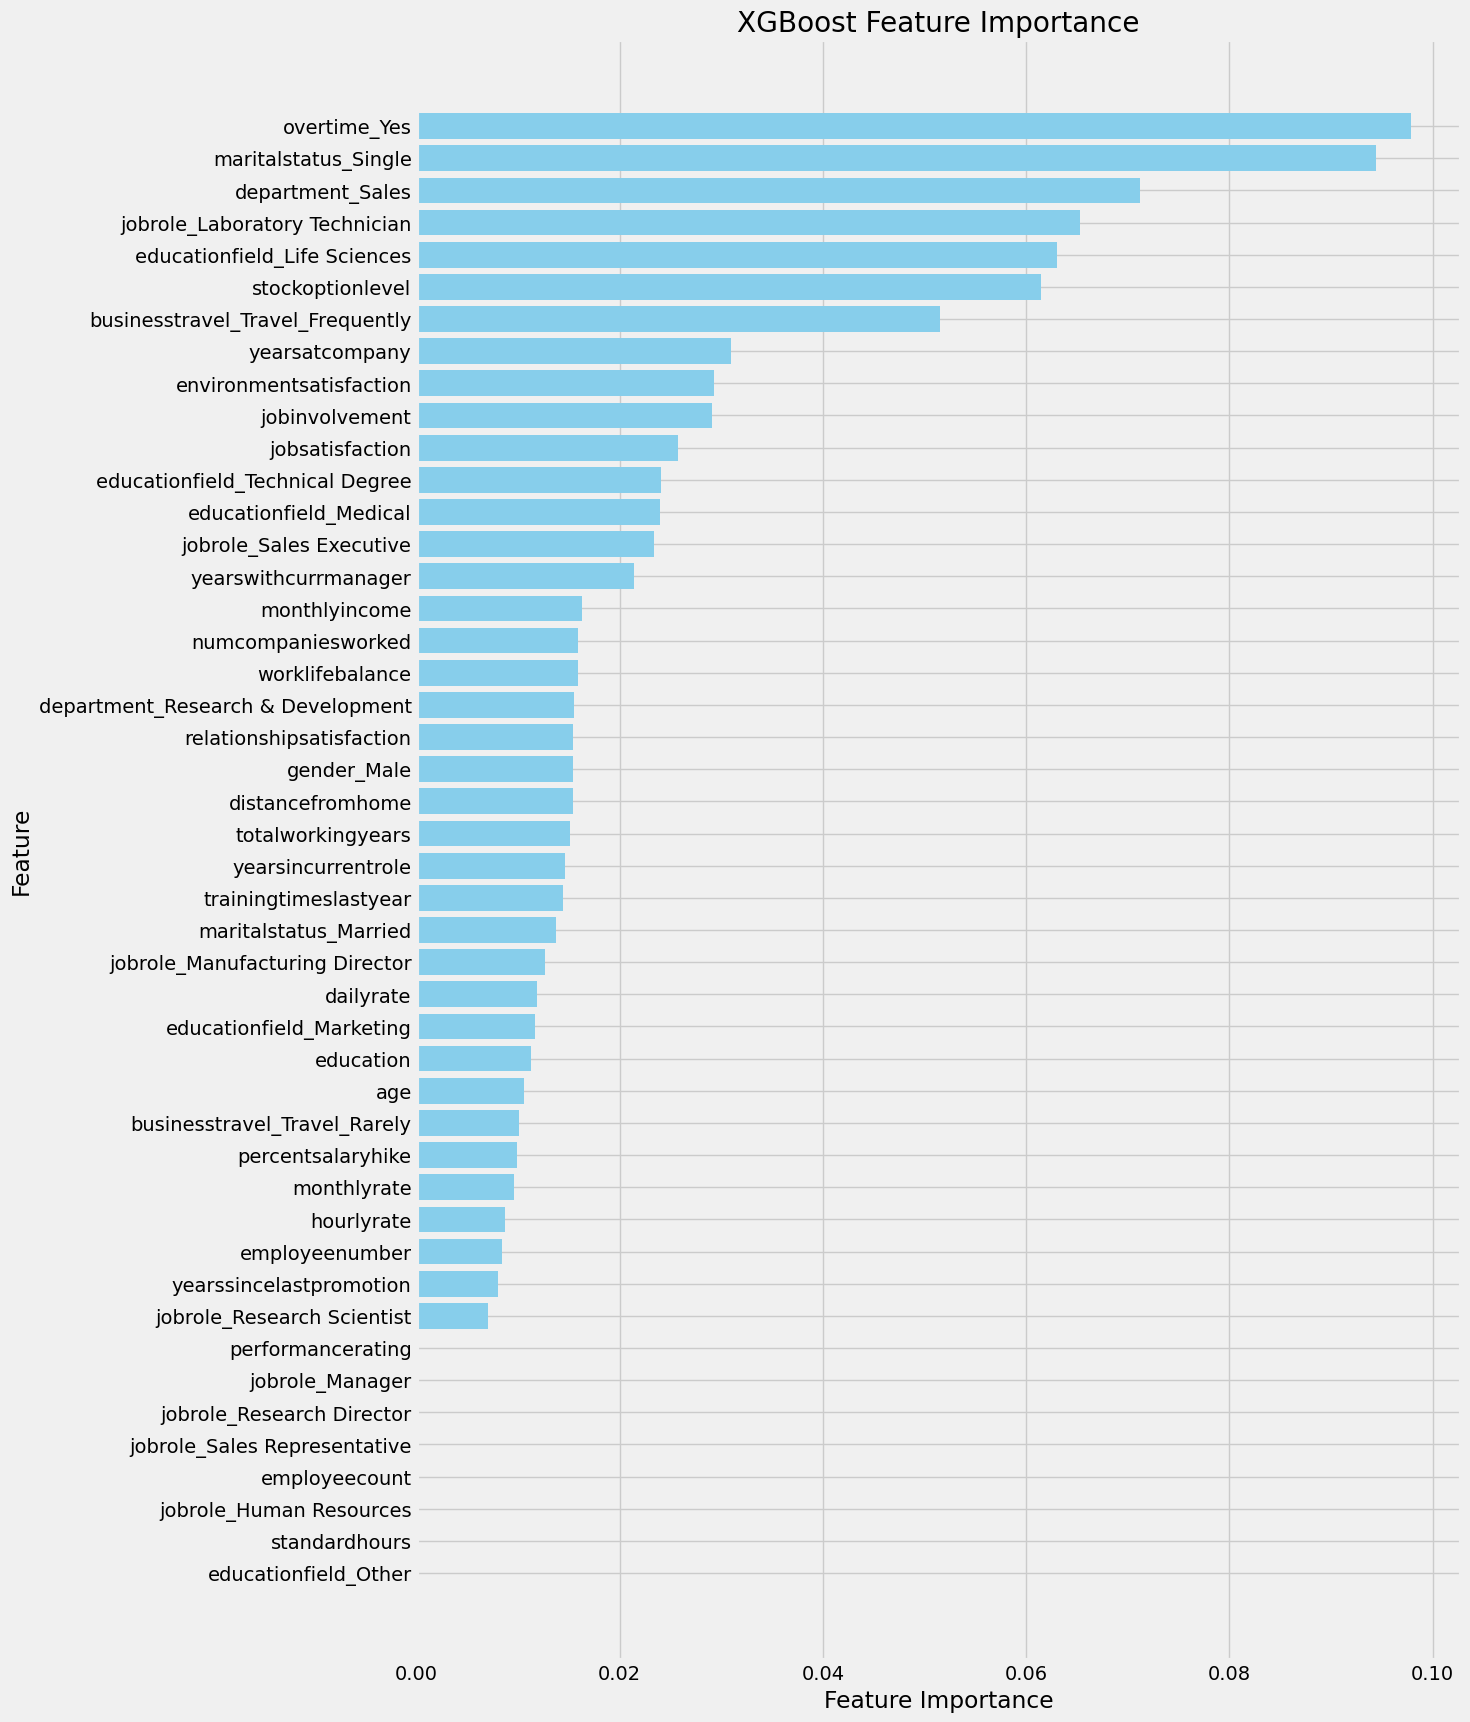

In [102]:
sorted_idx = np.argsort(importances_xgboost)[::-1]  # Descending order
important_xgboost = importances_xgboost[sorted_idx]
plt.figure(figsize=(12, 20))
plt.barh(xgb_model.feature_names_in_[sorted_idx], importances_xgboost[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [80]:
xgb_model.classes_

array([0, 1])

In [81]:
y_test.shape

(157,)

In [82]:
x_test.shape

(234, 46)

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

In [84]:
xgb_model.predict(X_test)
confusion_matrix(y_test, xgb_model.predict(X_test))

array([[73,  6],
       [14, 64]])

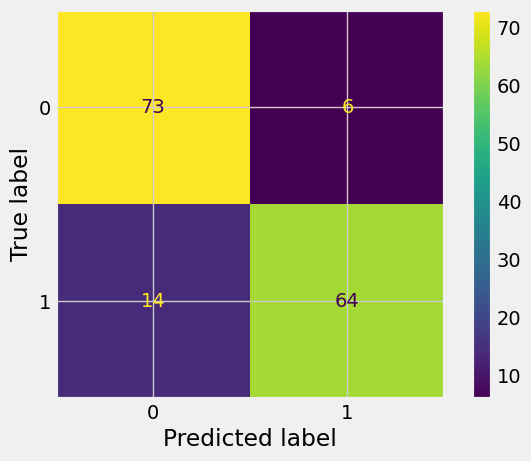

In [85]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test), labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xgb_model.classes_)
disp.plot()
plt.show()

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [86]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE
lgb_data = train_ibm_df.copy()

lgb_data.head(2)

# Handling categorical features
# YOUR CODE HERE
x_lgb_train, y_lgb_train = lgb_data.drop(["attrition"],axis=1),lgb_data["attrition"]
# Concat the dummy variables to actual dataframe and remove initial categorical columns


In [87]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_df2, y_df2 = smote.fit_resample(x_lgb_train, y_lgb_train)

In [88]:
y_df2.value_counts()

,attrition
0.0,785
1.0,785


### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [92]:
x_test, y_test = test_ibm_df.drop(["attrition"],axis=1),test_ibm_df["attrition"]

In [94]:
# Create LightGBM classifier model
# YOUR CODE HERE
def lgb_objective(space):

    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']),
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        scale_pos_weight = 5,
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )

    lgbm.fit(x_df2, y_df2)

    predictions = lgbm.predict(x_test)
    test_preds = lgbm.predict_proba(x_test)[:,1]
    train_preds = lgbm.predict_proba(x_df2)[:,1]

    train_auc = roc_auc_score(y_df2, train_preds)
    test_auc = roc_auc_score(y_test, test_preds)
    accuracy = accuracy_score(y_test, predictions)
    F1 = f1_score(y_test, predictions)

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc, 'f1 score': F1

           }

In [95]:
# Model training
trials = Trials()
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

lgb_hyperparams = fmin(fn = lgb_objective,
                 max_evals = 5,
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

# YOUR CODE HERE

[LightGBM] [Warning] feature_fraction is set=0.7112896653999826, colsample_bytree=0.5151229977393019 will be ignored. Current value: feature_fraction=0.7112896653999826
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7112896653999826, colsample_bytree=0.5151229977393019 will be ignored. Current value: feature_fraction=0.7112896653999826
[LightGBM] [Info] Number of positive: 785, number of negative: 785
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8374
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

### Model performance

In [96]:
# Model performance on all sets
# YOUR CODE HERE

lgbm_model= LGBMClassifier(
            learning_rate = lgb_hyperparams['learning_rate'],
            n_estimators= int(lgb_hyperparams['n_estimators']),
            max_depth = int(lgb_hyperparams['max_depth']),
            num_leaves = int(lgb_hyperparams['num_leaves']),
            colsample_bytree = lgb_hyperparams['colsample_bytree'],
            feature_fraction = lgb_hyperparams['feature_fraction'],
            scale_pos_weight = 5,
            reg_lambda = lgb_hyperparams['reg_lambda'],
            reg_alpha = lgb_hyperparams['reg_alpha'],
            min_split_gain = lgb_hyperparams['min_split_gain'])


lgbm_model.fit(x_df2, y_df2)

[LightGBM] [Warning] feature_fraction is set=0.5061018128051349, colsample_bytree=0.8184744257238443 will be ignored. Current value: feature_fraction=0.5061018128051349
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5061018128051349, colsample_bytree=0.8184744257238443 will be ignored. Current value: feature_fraction=0.5061018128051349
[LightGBM] [Info] Number of positive: 785, number of negative: 785
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8374
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

LGBMClassifier(colsample_bytree=0.8184744257238443,
               feature_fraction=0.5061018128051349,
               learning_rate=0.025185757323242068, max_depth=14,
               min_split_gain=0.0056006998733936575, n_estimators=75,
               num_leaves=125, reg_alpha=0.30685921620408374,
               reg_lambda=0.2930398006715321, scale_pos_weight=5)

In [97]:
accuracy_score(y_test, lgbm_model.predict(x_test))

[LightGBM] [Warning] feature_fraction is set=0.5061018128051349, colsample_bytree=0.8184744257238443 will be ignored. Current value: feature_fraction=0.5061018128051349


0.8376068376068376

In [98]:
print(classification_report(y_test, lgbm_model.predict(x_test)))

[LightGBM] [Warning] feature_fraction is set=0.5061018128051349, colsample_bytree=0.8184744257238443 will be ignored. Current value: feature_fraction=0.5061018128051349
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       196
         1.0       0.50      0.63      0.56        38

    accuracy                           0.84       234
   macro avg       0.71      0.75      0.73       234
weighted avg       0.86      0.84      0.84       234



[LightGBM] [Warning] feature_fraction is set=0.5061018128051349, colsample_bytree=0.8184744257238443 will be ignored. Current value: feature_fraction=0.5061018128051349


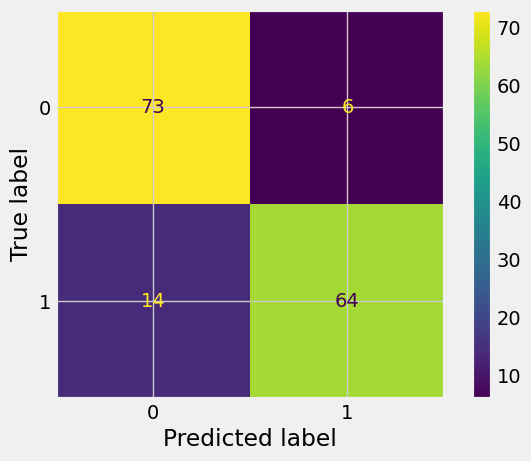

In [99]:
confusion_matrix(y_test, lgbm_model.predict(x_test), labels=lgbm_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lgbm_model.classes_)
disp.plot()
plt.show()

In [100]:
lgbm_model.feature_importances_

array([121, 114, 143,  66,   0, 125, 115, 153,  89,  93, 150, 124,  76,
       114,   0,  80,   0, 104, 132,  62,  88,  99,  97,  73,  58,  78,
        39,  48,  36,  65,  15,  52,   2,  17,  64,   0,  59,   1,   5,
         0,  28,  32,   2,  32,  79,  63], dtype=int32)

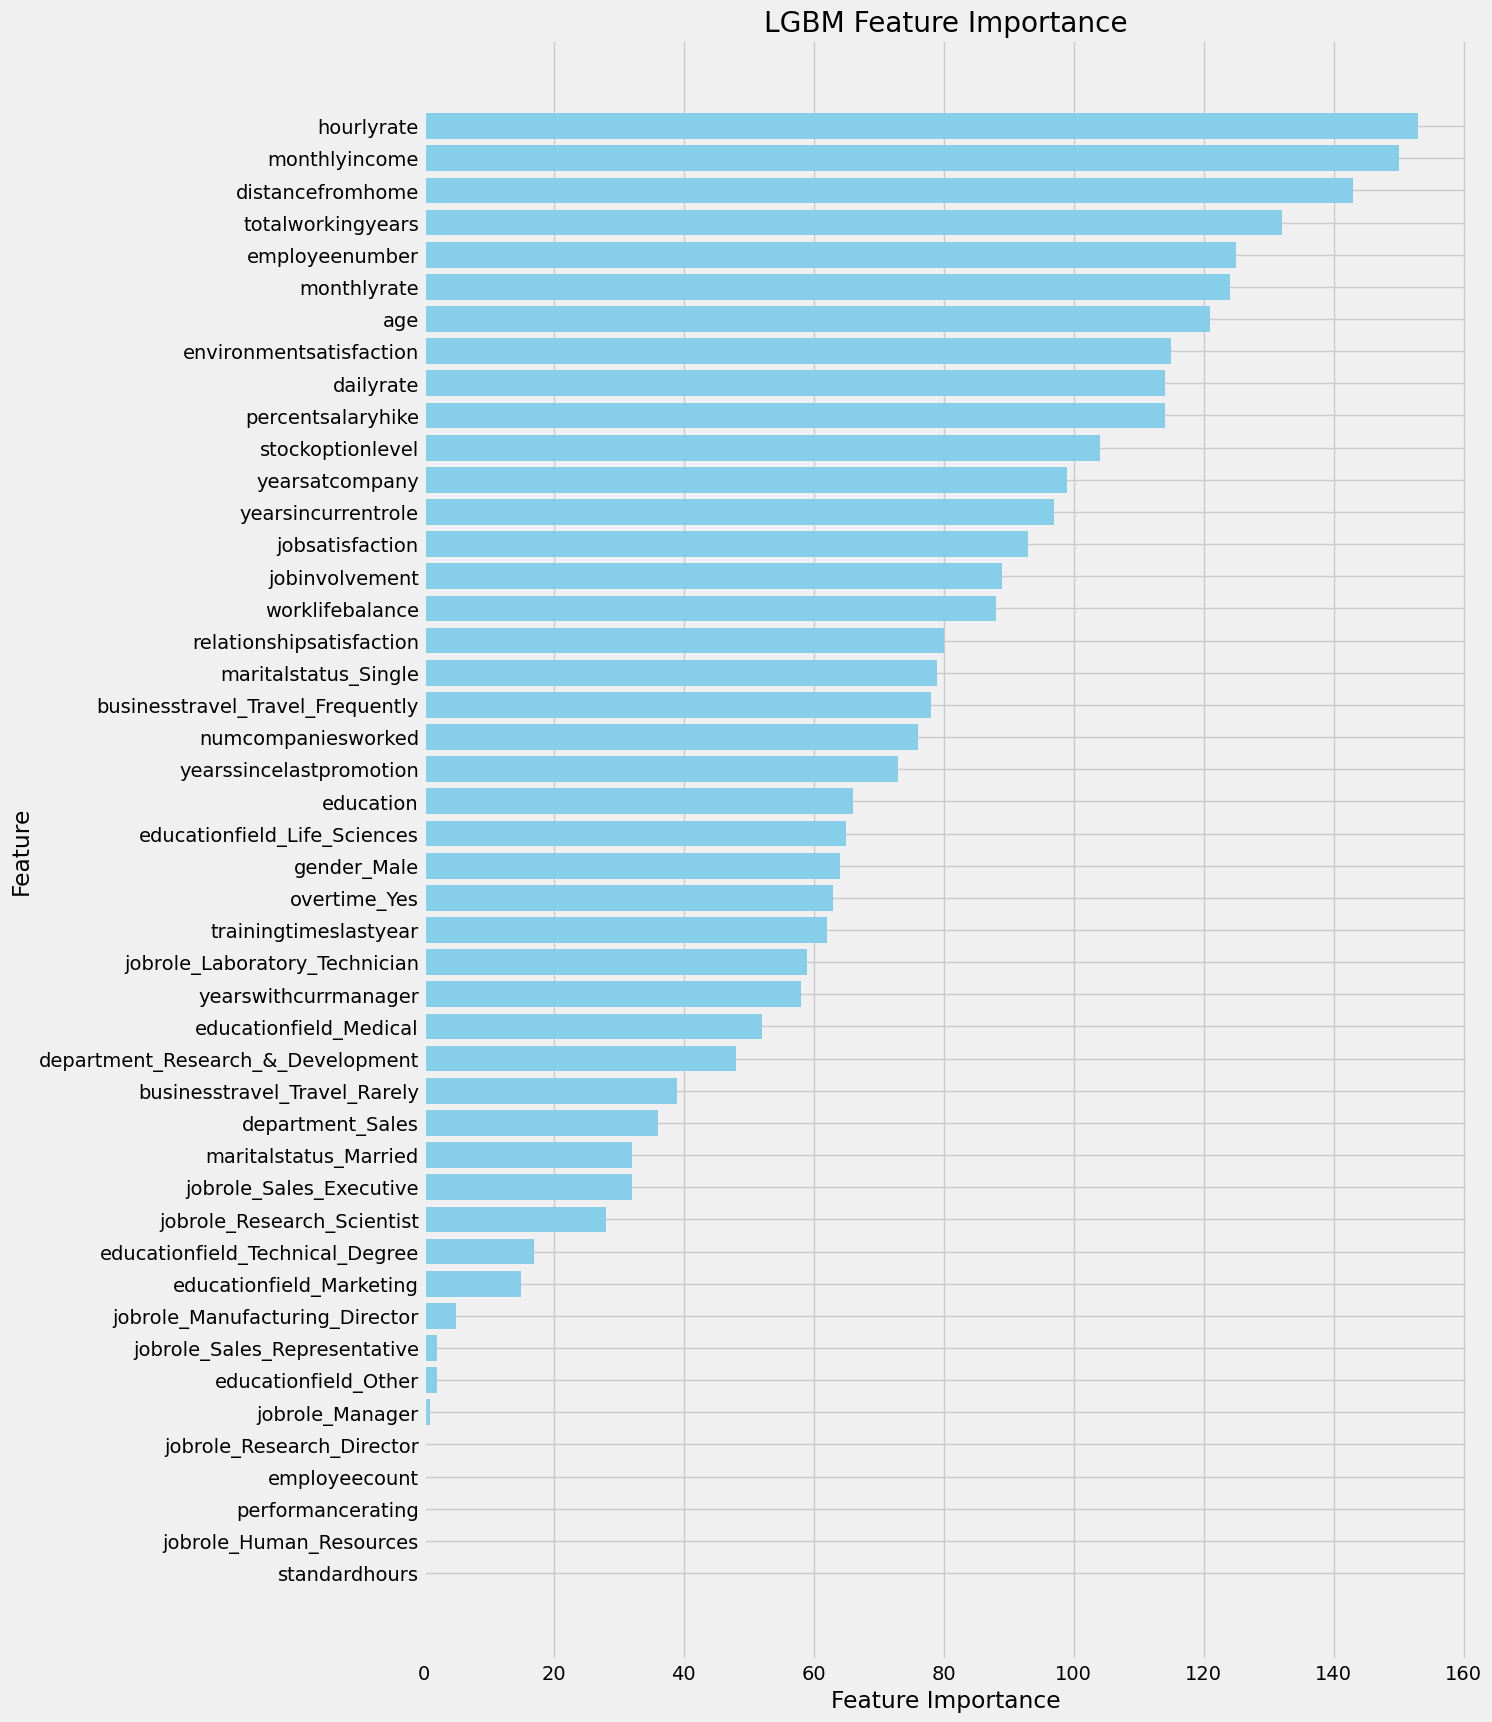

In [105]:
sorted_idx = np.argsort(lgbm_model.feature_importances_)[::-1]  # Descending order
important_lgbm = lgbm_model.feature_importances_[sorted_idx]
plt.figure(figsize=(12, 20))
plt.barh(lgbm_model.feature_names_in_[sorted_idx], lgbm_model.feature_importances_[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("LGBM Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [106]:
importances_df = pd.DataFrame()
importances_df['Feature Name'] = lgbm_model.feature_names_in_
# importances_df['Feature Imp CBoost'] = np.round(important_xgboost)
importances_df['Feature Imp XGBoost'] = np.round(important_xgboost*100)
importances_df['Feature Imp LightBoost'] = important_lgbm
# importances_df.sort_values(['Feature Imp CBoost', 'Feature Imp XGBoost', 'Feature Imp LightBoost'], ascending=False)

In [107]:
importances_df

,Feature Name,Feature Imp XGBoost,Feature Imp LightBoost
0,age,10.0,153
1,dailyrate,9.0,150
2,distancefromhome,7.0,143
3,education,7.0,132
4,employeecount,6.0,125
5,employeenumber,6.0,124
6,environmentsatisfaction,5.0,121
7,hourlyrate,3.0,115
8,jobinvolvement,3.0,114
9,jobsatisfaction,3.0,114
